# Matrix Factorization
- $A = P Q$

In [15]:
using Random
using Zygote
using Plots

In [16]:
function cost_reg(P, Q, A, λ=0)
    M, N = size(A)
    D = length(P[1,:])
    # D = size(P)[2]
    sum((A - P*Q).^2)/(M*N) + λ*(sum(P.^2)/M + sum(Q.^2)/N)/D
end

function cost(P, Q, A)
    M, N = size(A)
    # D = size(P)[2]
    sum((A - P*Q).^2)/(M*N)
end

cost (generic function with 1 method)

In [17]:
dcost_P(P,Q,A) = gradient(x -> cost(x,Q,A), P)[1]
dcost_Q(P,Q,A) = gradient(x -> cost(P,x,A), Q)[1]

dcost_Q (generic function with 1 method)

In [18]:
function train(A, D_featrues, N_epoch=100, μ=0.1)
    τ = 0.01
    M, N = size(A)
    P = rand(Float32, M, D_featrues) * τ
    Q = rand(Float32, D_featrues, N) * τ    
    
    J_a = zeros(Float32, N_epoch)
    J = cost(P,Q,A)
    for i in 1:N_epoch
        dP = dcost_P(P,Q,A)
        P -= μ * dP
        dQ = dcost_Q(P,Q,A)
        Q -= μ * dQ
        J = cost(P,Q,A)
        J_a[i] = J
    end
    P, Q, J_a
end

train (generic function with 3 methods)

In [20]:
function prepare_data(M=4, N=4)
    rand(Float32, M, N)
end

prepare_data (generic function with 3 methods)

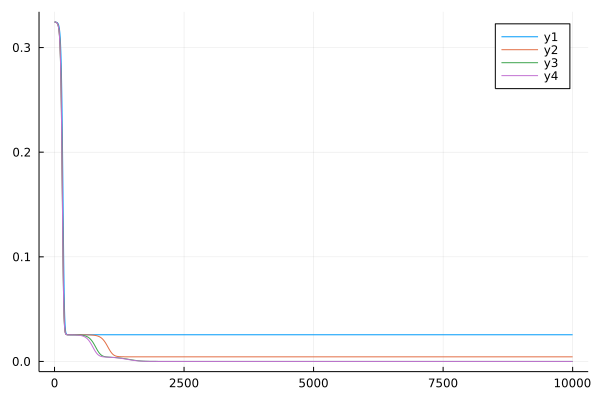

Last cost: J=0.025499335
Last cost: J=0.004415046
Last cost: J=4.70543e-5
Last cost: J=3.0936688e-5


In [22]:
function main()
    A = prepare_data(4,4)
    
    N_epoch = 10000
    function run(D_feature;plot=plot!)
        P, Q, J_a = train(A, D_feature, N_epoch)
        println("Last cost: J=$(J_a[end])")    
        plot(1:N_epoch, J_a)
    end
        
    run(1;plot=plot)
    run(2)    
    run(3)
    f = run(4)
    display(f)
end

main()

In [25]:
function test(A, D_feature=2, N_epoch = 1000)
    P, Q, J_a = train(A, D_feature, N_epoch)
    J_a[end]
end

test (generic function with 4 methods)

In [26]:
A = prepare_data(4,4)
@time test(A, 2, 1000)
@time test(A, 2, 10000)

  0.013032 seconds (51.81 k allocations: 4.752 MiB, 55.07% compilation time)
  0.049628 seconds (450.01 k allocations: 43.679 MiB, 17.35% gc time)


0.002193969f0